In [10]:
#Loading the data
import os 
import csv

lines=[]
data_folder = 'C:\data\\'
file = '\driving_log.csv'
for child in os.listdir(data_folder):
    data_subfolder = os.path.join(data_folder, child)
    sub_file = data_subfolder + file
    with open(sub_file) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)
    print ("file: ", sub_file, ", data samples: ", len(lines))
            
print("total data samples: ", len(lines))


file:  C:\data\1\driving_log.csv , data samples:  8036
file:  C:\data\2\driving_log.csv , data samples:  8666
file:  C:\data\3\driving_log.csv , data samples:  9351
file:  C:\data\4\driving_log.csv , data samples:  11100
file:  C:\data\5\driving_log.csv , data samples:  12044
file:  C:\data\6\driving_log.csv , data samples:  12460
total data samples:  12460


In [11]:
#Example of how the csv file holds the data
import pandas as pn
%matplotlib inline

column_names = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
data_sample = pn.read_csv(data_folder + os.listdir(data_folder)[0] + file ,names=column_names)
data_sample.iloc[:10]

,center,left,right,steering,throttle,brake,speed
0,C:\data\1\IMG\center_2016_12_01_13_30_48_287.jpg,C:\data\1\IMG\left_2016_12_01_13_30_48_287.jpg,C:\data\1\IMG\right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,C:\data\1\IMG\center_2016_12_01_13_30_48_404.jpg,C:\data\1\IMG\left_2016_12_01_13_30_48_404.jpg,C:\data\1\IMG\right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,C:\data\1\IMG\center_2016_12_01_13_31_12_937.jpg,C:\data\1\IMG\left_2016_12_01_13_31_12_937.jpg,C:\data\1\IMG\right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,C:\data\1\IMG\center_2016_12_01_13_31_13_037.jpg,C:\data\1\IMG\left_2016_12_01_13_31_13_037.jpg,C:\data\1\IMG\right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,C:\data\1\IMG\center_2016_12_01_13_31_13_177.jpg,C:\data\1\IMG\left_2016_12_01_13_31_13_177.jpg,C:\data\1\IMG\right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
5,C:\data\1\IMG\center_2016_12_01_13_31_13_279.jpg,C:\data\1\IMG\left_2016_12_01_13_31_13_279.jpg,C:\data\1\IMG\right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993
6,C:\data\1\IMG\center_2016_12_01_13_31_13_381.jpg,C:\data\1\IMG\left_2016_12_01_13_31_13_381.jpg,C:\data\1\IMG\right_2016_12_01_13_31_13_381.jpg,0.0,0.0,0.0,1.389892
7,C:\data\1\IMG\center_2016_12_01_13_31_13_482.jpg,C:\data\1\IMG\left_2016_12_01_13_31_13_482.jpg,C:\data\1\IMG\right_2016_12_01_13_31_13_482.jpg,0.0,0.0,0.0,1.375934
8,C:\data\1\IMG\center_2016_12_01_13_31_13_584.jpg,C:\data\1\IMG\left_2016_12_01_13_31_13_584.jpg,C:\data\1\IMG\right_2016_12_01_13_31_13_584.jpg,0.0,0.0,0.0,1.362115
9,C:\data\1\IMG\center_2016_12_01_13_31_13_686.jpg,C:\data\1\IMG\left_2016_12_01_13_31_13_686.jpg,C:\data\1\IMG\right_2016_12_01_13_31_13_686.jpg,0.0,0.0,0.0,1.348435


In [12]:
lines_new = lines[1:3]
print(lines_new)

[['C:\\data\\1\\IMG\\center_2016_12_01_13_30_48_404.jpg', 'C:\\data\\1\\IMG\\left_2016_12_01_13_30_48_404.jpg', 'C:\\data\\1\\IMG\\right_2016_12_01_13_30_48_404.jpg', '0', '0', '0', '21.87963'], ['C:\\data\\1\\IMG\\center_2016_12_01_13_31_12_937.jpg', 'C:\\data\\1\\IMG\\left_2016_12_01_13_31_12_937.jpg', 'C:\\data\\1\\IMG\\right_2016_12_01_13_31_12_937.jpg', '0', '0', '0', '1.453011']]


In [13]:
# Looping the csv lines and uploading all the images as the dataset 
import cv2
import numpy as np

images = []
measurments = []
for line in lines_new:
    image_center = cv2.imread(line[0])
    #print(image_center.shape)
    image_left = cv2.imread(line[1])
    #print(image_left.shape)
    image_right = cv2.imread(line[2])
    #print(image_right.shape)
    images.extend([image_center, image_left, image_right])
    #print(line[3])
    steering = float(line[3])
    measurments.extend([steering, steering+0.1, steering-0.1])
    
X_train = np.array(images)
y_train = np.array(measurments)

print("features Shape: ", X_train.shape)
print("lables Shape: ", len(y_train))

(160, 320, 3)
(160, 320, 3)
(160, 320, 3)
(160, 320, 3)
(160, 320, 3)
(160, 320, 3)
features Shape:  (6, 160, 320, 3)
lables Shape:  6


(160, 320, 3)


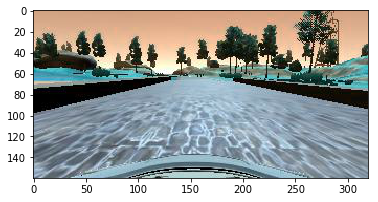

In [51]:
import matplotlib.pyplot as plt

sample_img = images[0]
print (sample_img.shape)
plt.imshow(sample_img)


(80, 320, 3)


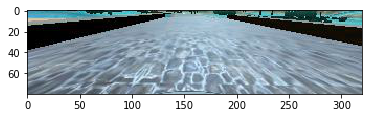

In [52]:
crop_img = sample_img[60:140, 0:320]
print (crop_img.shape)
plt.imshow(crop_img)


TypeError: Invalid dimensions for image data

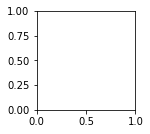

In [18]:
import cv2

img = X_train

plt.subplot(2, 2, 1)
plt.imshow(img) 
plt.title('original image: ')
plt.axis('off')
    

cv2.imshow("original", img)
crop_img = img[50:100, 20:80]
cv2.imshow("original", img)
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)

In [ ]:
#The distribution of the steering angle for the dataset
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl

plt.hist(y_train)
plt.title("Distribution of the Steering lables")
plt.ylabel("Number of samples")
plt.xlabel("steering angle")
plt.show()

fit = stats.norm.pdf(y_train, np.mean(y_train), np.std(y_train))  #this is a fitting indeed
plt.plot(y_train,fit,'-o', color='g')
plt.hist(y_train,normed=True,color='dodgerblue')      #use this to draw histogram of your data
plt.title("Distribution of the Steering lables")
plt.ylabel("Number of samples")
plt.xlabel("steering angle")
plt.show()  

In [ ]:
#Augmentation - flip all images

aug_images, aug_measurments= [], []
for image, measurment in zip(X_train, y_train):
    aug_images.append(cv2.flip(image,1))
    aug_measurments.append(measurment*-1.0)
    

print("augmented features Shape: ", len(aug_images))
print("augmented lables Shape: ", len(aug_measurments))

In [ ]:
# Adding the augmented images to the train data

X_train = np.concatenate([X_train, aug_images])
y_train = np.concatenate([y_train, aug_measurments])
print(X_train.shape, y_train.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from time import time
start_time = time()

dropout = 0.5

model = Sequential()
#normalization and mean zero - centered around zero with small standard deviation 
model.add(Lambda(lambda x: x/255.0 -0.5, input_shape=(160,320,3))) 
#cropping2D layer
model.add(Cropping2D(cropping=((70,25), (0,0)), input_shape=(160,320,3)))
#model.add(Flatten())
model.add(Dense(1))
model.add(Conv2D(24, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout))
model.add(Conv2D(36, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout))
model.add(Conv2D(48, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50)
model.add(Dense(10,activation='relu'))
model.add(Dense(1)

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=3, verbose = 1)
model.save('model.h5')

total_time = time() - start_time
minutes, seconds = divmod(total_time, 60)
print ("Total time for uploading data: ", minutes, "min, {:.0f}".format(seconds),  "s ")

In [ ]:
import cv2
import numpy as np
from sklearn.utils import shuffle

# Spliting the dataset to Train and Validation
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(lines, test_size=0.2)

def augmentation(images, measurments):
    aug_images, aug_measurments= [], []
    for image, measurment in zip(images, measurments):
        aug_images.append(cv2.flip(image,1))
        aug_measurments.append(measurment*-1.0)
    return aug_images, aug_measurments

def generator(samples, batch_size=32):
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, len(samples), batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            measurments = []
            for line in lines:

                image_center = cv2.imread(line[0])
                image_left = cv2.imread(line[1])
                image_right = cv2.imread(line[2])
                images.extend([image, image_left, image_right])

                steering = float(line[3])
                measurments.extend([steering, steering+0.1, steering-0.1])
                
                augmented_images, augmented_measurments = augmentation([image, image_left, image_right], [steering, steering+0.1, steering-0.1])
                images.extend(augmented_images)
                measurments.extend(augmented_measurments)
                
            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(measurments)
            yield sklearn.utils.shuffle(X_train, y_train)

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)

#print("features Shape: ", train_generator)
#print("lables Shape: ", validation_generator)

In [ ]:
from keras.models import Model
import matplotlib.pyplot as plt

history_object = model.fit_generator(train_generator, samples_per_epoch = len(train_samples), 
    validation_data = validation_generator, nb_val_samples = len(validation_samples), nb_epoch=5, verbose=1)

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()